# Individual Analysis for the Franck-Hertz Experiment

Use this template to carry out the analysis tasks for the experiment.  You may need to consult the documentation for different Python packages.  Also recommended: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

We will also be using [**LMFit**](https://lmfit.github.io/lmfit-py/) for curve fitting 
and the [Uncertainties](https://pythonhosted.org/uncertainties/) package for calculating statistical uncertainty. 

In [10]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from lmfit.models import LinearModel
from lmfit.models import QuadraticModel

## Summary of tasks

### Prior to working on this notebook

1. Watch the videos on the experiment and work out at least exercises 2 and 3 on the mean free path of electrons in the mercury F-H tube given in the experiment instructions.  These will be relevant to the "RSB" method of analyzing Franck-Hertz data.


2. Read through the paper by Rapior, Sengstock and Baev (RSB) linked on the experiment page: Rapior, G., K. Sengstock, and V Baev, <a href="http://courses.washington.edu/phys432/restricted/AJP_rapior_sengstock_baev.pdf" target="_blank">"New features of the Franck-Hertz experiment,"</a> <i>Am. J. Phys.,</i> <strong>74</strong>, p. 423-428 (2006).  Also study the lecture notes on this paper.


3. Download the PDFs of the chart-recorder scans for the two Franck-Hertz data runs (one for Hg, the other for Ne).


4. Extract from the scans the positions in paper-grid units of (1) calibration marks, (2) positions of anode current minima ("troughs") and maxima ("peaks"), and, for neon (3) positions of the small features (tiny peaks and troughs) seen in the neon-scan lock-in amp output.  The separations of similar features will be used to estimate the 3s-3p state separation.  **You do not need to estimate the uncertainty in these measurements**, but make your estimates of position to within 1/10 of small square.


5. Assign numbers to each anode current feature, for example, 1, 2, 3,... for peak 1, peak 2, peak 3... and similarly for the troughs.  (Not necessary for the Ne lock-in scan; these will be analyzed differently.)


6. Create spreadsheets with these data to be read into the notebook for further processing.

### Tasks for this notebook

For the neon data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.


* From the measurements taken from the lock-in scan for neon, take differences between adjacent features that indicate transitions between the 3s and 3p states.  Look at the list of differences to see if they have about the same value, and check any outliers against the original XY plot.  Then calculate an average and uncertainty to compare to the expected 1.7 V average separation between these states.

For the mercury data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.

* Use the fit coefficients associated with the RSB method to estimate the mean free path of the electrons between collisions with Hg atoms.  You will also need a dimension from the picture of the Hg tube.  Compare this result to the one calculated from the exercises and to the results cited by RSB in their paper.


## Read in the Franck-Hertz Data

You will probably want 4 to 5 different DataFrames: Neon calibration, neon peak/trough positions, neon small-feature positions, Mercury calibration, and mercury peak/trough positions.

One way to do it is create a different CSV file for each DataFrame.  Another way is to put each spreadsheet on a different Excel sheet within a single Excel file.  You can read the whole file into a Pandas "OrderedDict"
with the command 

    `FHdata = pd.read_excel('Franck-Hertz_data.xlsx', sheet_name = None)`

Then each sheet will be in its own DataFrame that you would reference with `FHdata['sheet-name']`.

In [8]:
# Example
FHdata = pd.ExcelFile('data.xlsx')      
# The keys are the sheet names
FHdata.sheet_names

['Neon Lock-In Calibration',
 'Neon PDA Calibration',
 'Neon Lock-In Min and Max',
 'Neon Lock-In Small Features',
 'Neon PDA Min and Max',
 'Mercury Lock-In Calibration',
 'Mercury PDA Calibration',
 'Mercury Lock-In Min and Max',
 'Mercury PDA Min and Max']

## Neon Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

In [9]:
# Look at the calibration data first
Ne_calib = pd.read_excel(FHdata, 'Neon PDA Calibration')
Ne_calib.head()

,grid x,grid y,voltage (V),current (nA),min or max
0,3.25,10.5,2,0,NaN
1,25.25,10.5,20,0,NaN
2,49.50,10.5,40,0,NaN
3,74.00,10.5,60,0,NaN
4,86.00,10.5,70,0,NaN


### Fit a line

You know how to do this.  Save the fit results to use in the calibration function

In [29]:
##  Hint: make a function to do the fitting and plotting of the fit
##  Have it return the fit parameters as a Parameters object, like this

def model_fit_and_plot(xdata,ydata,model=LinearModel()):
    # Fit the data
    params = model.guess(ydata, x=xdata)
    fit = model.fit(ydata, params, x=xdata)
    # Plot the data and the fit
    fitx = np.linspace(xdata.min(), xdata.max(), 100)
    fity = fit.params['slope'].value * fitx + fit.params['intercept'].value
    plt.plot(xdata,ydata,'o',label='data')
    plt.plot(fitx,fity,label='fit')
    plt.xlabel('grid x')
    plt.ylabel('voltage (V)')
    plt.legend()
    return fit


### Write a calibration function

Pass your fit constants to the calibration function.  Test it.

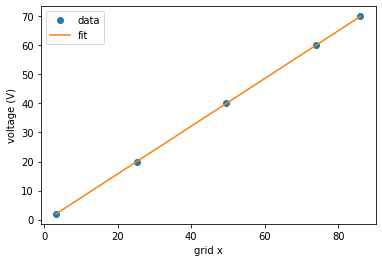

In [30]:
# Pass your fit constants to the calibration function
Ne_calib_fit = model_fit_and_plot(Ne_calib['grid x'],Ne_calib['voltage (V)'])

In [24]:
Ne_calib_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,0.82133758,0.00102836,(0.13%),0.8213375847637925,-inf,inf,True
intercept,-0.69566903,0.05811869,(8.35%),-0.6956690347565149,-inf,inf,True


### Apply the calibration

You might want to add columns of the calibrated data to the existing DataFrame, or make new DataFrames or arrays.  It is up to you.

In [32]:
Ne_pda = pd.read_excel(FHdata, 'Neon PDA Min and Max')
# apply the calibration to the Voltage data
Ne_pda['voltage (V)'] = Ne_calib_fit.params['slope'].value * Ne_pda['grid x'] + Ne_calib_fit.params['intercept'].value
Ne_pda.head()

,grid x,grid y,voltage (V),current (nA),min or max
0,17.5,20.50,13.677739,NaN,max
1,26.5,9.25,21.069777,NaN,min
2,38.5,28.00,30.925828,NaN,max
3,48.0,8.50,38.728535,NaN,min
4,60.5,35.00,48.995255,NaN,max


In [33]:
# select min and max values
Ne_pda_min = Ne_pda.loc[Ne_pda['min or max'] == 'min']
Ne_pda_max = Ne_pda.loc[Ne_pda['min or max'] == 'max']

In [38]:
# add a column of peak number for the min and max data as their order in the data
Ne_pda_min['peak number'] = np.linspace(1,len(Ne_pda_min),len(Ne_pda_min), dtype=int)
Ne_pda_max['peak number'] = np.linspace(1,len(Ne_pda_max),len(Ne_pda_max), dtype=int)

C:\Users\alber\AppData\Local\Temp/ipykernel_198636/3786356982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ne_pda_min['peak number'] = np.linspace(1,len(Ne_pda_min),len(Ne_pda_min), dtype=int)
C:\Users\alber\AppData\Local\Temp/ipykernel_198636/3786356982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ne_pda_max['peak number'] = np.linspace(1,len(Ne_pda_max),len(Ne_pda_max), dtype=int)


Make a plot, just to check that it looks OK.

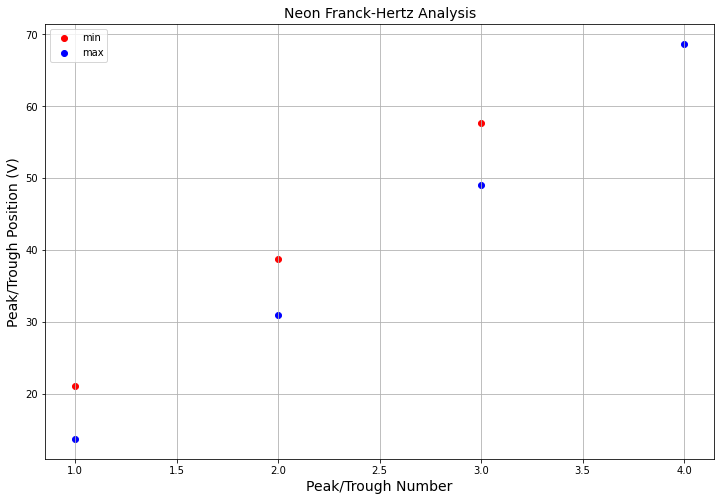

In [39]:
# plot min and max values of voltage separately versus peak number
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
plt.scatter(Ne_pda_min['peak number'],Ne_pda_min['voltage (V)'],label='min',color='red')
plt.scatter(Ne_pda_max['peak number'],Ne_pda_max['voltage (V)'],label='max',color='blue')
plt.legend()

### Fit the peak/trough positions 

Fit the peak and trough positions versus number in two different ways: with a line, to find the average spacing, and with a quadratic, to find the coefficients to apply to the model of RSB.  Save the fit results.  Recommended: just same the `params` object as a whole.

To fit to a quadratic, you may us the `QuadraticModel` in exactly the same way as the `LinearModel`.  Look up **QuadraticModel** in the LMFit documenation for details.

#### Neon troughs first

In [43]:
# define the model fit function
def model_fit(xdata,ydata,model=LinearModel()):
    # Fit the data
    params = model.guess(ydata, x=xdata)
    fit = model.fit(ydata, params, x=xdata)
    return fit

In [44]:
# Troughs line linear fit
Ne_min_Lfit = model_fit(Ne_pda_min['peak number'],Ne_pda_min['voltage (V)'], model=LinearModel())

In [45]:
# throughs line quadratic fit
Ne_min_Qfit = model_fit(Ne_pda_min['peak number'],Ne_pda_min['voltage (V)'], model=QuadraticModel())

#### Now neon peaks

In [46]:
# Peaks line linear fit
Ne_max_Lfit = model_fit(Ne_pda_max['peak number'],Ne_pda_max['voltage (V)'], model=LinearModel())

In [47]:
# Peaks quadratic
Ne_max_Qfit = model_fit(Ne_pda_max['peak number'],Ne_pda_max['voltage (V)'], model=QuadraticModel())

### Plot the fitlines over the data

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

Use the `model.eval()` function with the saved parameters to build fit lines. 

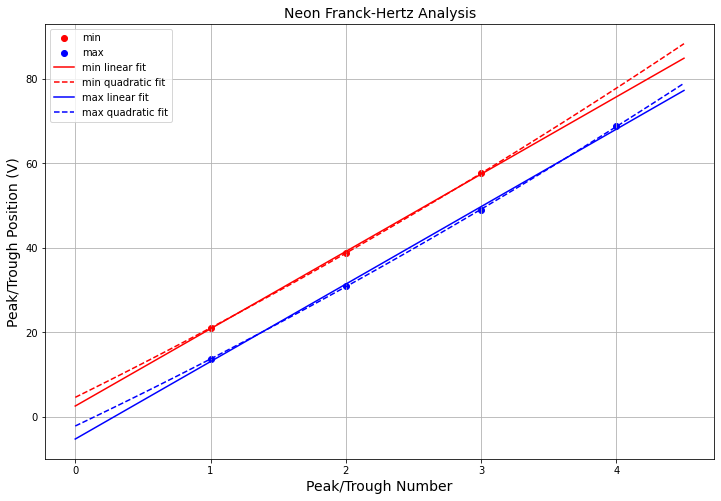

In [50]:
# For a smooth curve make an x range with a bunch of points.  100 should be fine.
xfit = np.linspace(0,4.5,100)
# calculate the y values for the fit
y_ne_min_Lfit = Ne_min_Lfit.eval(x=xfit)
y_ne_min_Qfit = Ne_min_Qfit.eval(x=xfit)
y_ne_max_Lfit = Ne_max_Lfit.eval(x=xfit)
y_ne_max_Qfit = Ne_max_Qfit.eval(x=xfit)
# Then redo the above plot with fit lines and curves
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
plt.scatter(Ne_pda_min['peak number'],Ne_pda_min['voltage (V)'],label='min',color='red')
plt.scatter(Ne_pda_max['peak number'],Ne_pda_max['voltage (V)'],label='max',color='blue')
plt.plot(xfit,y_ne_min_Lfit,label='min linear fit',color='red')
plt.plot(xfit,y_ne_min_Qfit,label='min quadratic fit',color='red',linestyle='--')
plt.plot(xfit,y_ne_max_Lfit,label='max linear fit',color='blue')
plt.plot(xfit,y_ne_max_Qfit,label='max quadratic fit',color='blue',linestyle='--')
plt.legend()

### Take differences in peak/trough positions

Next, apply the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [54]:
Ne_pda_min

,grid x,grid y,voltage (V),current (nA),min or max,peak number,difference
1,26.5,9.25,21.069777,NaN,min,1,NaN
3,48.0,8.50,38.728535,NaN,min,2,17.658758
5,71.0,15.50,57.619299,NaN,min,3,18.890764


In [57]:
Ne_pda_max

,grid x,grid y,voltage (V),current (nA),min or max,peak number,difference
0,17.5,20.5,13.677739,NaN,max,1,NaN
2,38.5,28.0,30.925828,NaN,max,2,17.248089
4,60.5,35.0,48.995255,NaN,max,3,18.069427
6,84.5,42.5,68.707357,NaN,max,4,19.712102


In [55]:
# calculate difference in each rows by subtracting the next row from the current row
Ne_pda_min['difference'] = Ne_pda_min['voltage (V)'] - Ne_pda_min['voltage (V)'].shift(1)
Ne_pda_max['difference'] = Ne_pda_max['voltage (V)'] - Ne_pda_max['voltage (V)'].shift(1)
Ne_pda['difference'] = Ne_pda['voltage (V)'] - Ne_pda['voltage (V)'].shift(1)

# print the difference between each row as a list
print(Ne_pda_min['difference'].tolist())
print(Ne_pda_max['difference'].tolist())

[nan, 17.658758072421538, 18.89076444956723]
[nan, 17.24808928003964, 18.06942686480344, 19.712102034331018]


C:\Users\alber\AppData\Local\Temp/ipykernel_198636/3918169898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ne_pda_min['difference'] = Ne_pda_min['voltage (V)'] - Ne_pda_min['voltage (V)'].shift(1)
C:\Users\alber\AppData\Local\Temp/ipykernel_198636/3918169898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ne_pda_max['difference'] = Ne_pda_max['voltage (V)'] - Ne_pda_max['voltage (V)'].shift(1)


In [73]:
# Drop the first row as it is NaN and fit the min difference to linear
select_min_diff = Ne_pda_min.drop([1])
Ne_min_diff_fit = model_fit(select_min_diff['peak number'],select_min_diff['difference'], model=LinearModel())


In [76]:
# Next, peak diffs
select_max_diff = Ne_pda_max.drop([0])
Ne_max_diff_fit = model_fit(select_max_diff['peak number'],select_max_diff['difference'], model=LinearModel())


### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

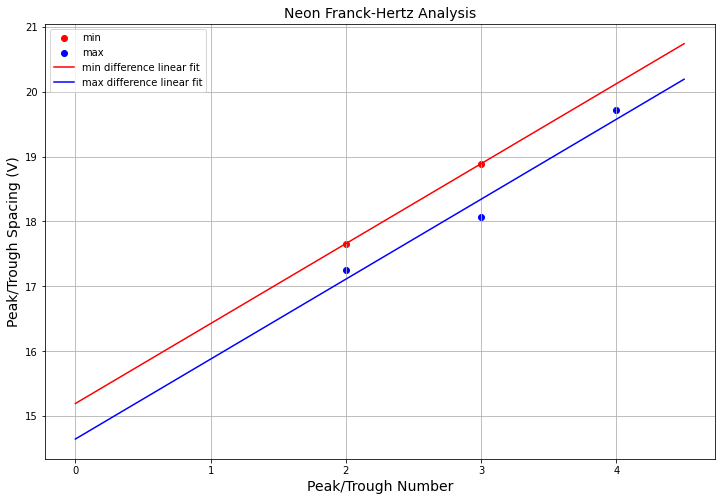

In [79]:
# Plot here
# Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Spacing (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
plt.scatter(select_min_diff['peak number'],select_min_diff['difference'],label='min',color='red')
plt.scatter(select_max_diff['peak number'],select_max_diff['difference'],label='max',color='blue')
xfit = np.linspace(0,4.5,100)
plt.plot(xfit,Ne_min_diff_fit.eval(x=xfit),label='min difference linear fit',color='red')
plt.plot(xfit,Ne_max_diff_fit.eval(x=xfit),label='max difference linear fit',color='blue')
plt.legend()

## Final results for neon excited state

Compare fit coefficients from the quadratic to similar from the RSB difference method.  Then calculate values for the lowest excited state of Neon from the three methods of analyzing the data set: simple average peak spacing, and RSB calculation from the results of the other two fits.

From the RSB analysis, expect energy troughs to follow

$$ E_n = E_a\frac{\lambda}{L}n^2 + E_an + c  = an^2 + bn +c$$

where $c$ is a constant, $n$ is the trough number, $\lambda/L$ is the ratio of the mean free path to the total travel distance from electrode to electrode, and $E_a$ is the lowest excited state.

Taking differences, RSB derive

$$ \Delta E(n) = E_{n} - E_{n-1} = E_a\left(1-\frac{\lambda}{L}\right) + E_a2\frac{\lambda}{L}n = p + mn$$

Thus, a quadratic fit to the trough positions should give $E_a$ as the linear-term coefficient, and a linear fit to  the differences in trough positions should give a line that evaluates to $E_a$ for $n=0.5$.

Further, if $m$ and $p$ are the slope and intercept of the linear fit to the differences, and $a$, $b$, and $c$ are the 2nd, 1st and 0th order coefficients in the quadratic fit to trough positions, then we expect $p=b-a$ and $m=2a$.

In [82]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
a = Ne_min_Qfit.params['a'].value
b = Ne_min_Qfit.params['b'].value
p = b-a
m = 2*a
print('p = b-a: {:.2f} = {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m = 2a: {:.2f} = {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\nPeaks analysis:')
a = Ne_max_Qfit.params['a'].value
b = Ne_max_Qfit.params['b'].value
p = b-a
m = 2*a
print('p = b-a: {:.2f} = {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m = 2a: {:.2f} = {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')
Ea_trad_pk = np.mean(select_max_diff['difference'])
Ea_trad_tr = np.mean(select_min_diff['difference'])
print('"Traditional" average peak spacing: {:.2f} V'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2f} V'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2
a = Ne_min_Qfit.params['a'].value
b = Ne_min_Qfit.params['b'].value
p = b-a
m = 2*a

print('\nRSB method using line fit to peak/trough position differences')

print('E_a = p + m/2= {:.2f} + {:.2f}/2 = {:.2f}'.format(p,m,p+m/2))

print('\nRSB method using quadratic fit to peak/trough positions')

print('E_a = b = {:.2f}'.format(b))


CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p = b-a: 15.19 = 15.19 = 15.81-0.62
m = 2a: 1.23 = 1.23 = 2*0.62

Peaks analysis:
p = b-a: 14.62 = 14.62 = 15.24-0.62
m = 2a: 1.23 = 1.23 = 2*0.62


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 18.34 V
"Traditional" average trough spacing: 18.27 V

RSB method using line fit to peak/trough position differences
E_a = p + m/2= 15.19 + 1.23/2 = 15.81

RSB method using quadratic fit to peak/trough positions
E_a = b = 15.81


## Calculate the 3p-3s energy spacing

Calculate the differences between similar closely spaced features in the lock-in scan for neon.  Convert paper positions to voltages first, then take differences and make a list.  See if they are similar values.  Then take an average.

In [84]:
# read neon lock in small feature
Ne_SF = pd.read_excel(FHdata, sheet_name='Neon Lock-In Small Features')
Ne_SF.head()

,grid x,grid y,voltage (V),current (nA),feature
0,11.00,72.00,NaN,NaN,A
1,16.25,67.00,NaN,NaN,B
2,26.00,59.75,NaN,NaN,C
3,30.25,85.50,NaN,NaN,D
4,34.75,75.70,NaN,NaN,E


In [86]:
# apply linear fit to grid x data and get voltage
# Ne_pda['voltage (V)'] = Ne_calib_fit.params['slope'].value * Ne_pda['grid x'] + Ne_calib_fit.params['intercept'].value
Ne_SF['voltage (V)'] = Ne_calib_fit.params['slope'].value * Ne_SF['grid x'] + Ne_calib_fit.params['intercept'].value
Ne_SF

,grid x,grid y,voltage (V),current (nA),feature
0,11.00,72.00,8.339044,NaN,A
1,16.25,67.00,12.651067,NaN,B
2,26.00,59.75,20.659108,NaN,C
3,30.25,85.50,24.149793,NaN,D
4,34.75,75.70,27.845812,NaN,E
5,35.75,73.25,28.667150,NaN,F
6,41.00,39.00,32.979172,NaN,G
7,47.00,48.00,37.907197,NaN,H
8,48.50,82.00,39.139204,NaN,I
9,49.50,75.50,39.960541,NaN,J


In [159]:
# to get the peak to peak value, there must be at least one features away from each other
# calculate difference in each rows by subtracting the next 2 row from the current row
Ne_SF['difference'] = Ne_SF['voltage (V)'] - Ne_SF['voltage (V)'].shift(2)
Ne_SF

,grid x,grid y,voltage (V),current (nA),feature,difference
0,11.00,72.00,8.339044,NaN,A,NaN
1,16.25,67.00,12.651067,NaN,B,NaN
2,26.00,59.75,20.659108,NaN,C,12.320064
3,30.25,85.50,24.149793,NaN,D,11.498726
4,34.75,75.70,27.845812,NaN,E,7.186704
5,35.75,73.25,28.667150,NaN,F,4.517357
6,41.00,39.00,32.979172,NaN,G,5.133360
7,47.00,48.00,37.907197,NaN,H,9.240048
8,48.50,82.00,39.139204,NaN,I,6.160032
9,49.50,75.50,39.960541,NaN,J,2.053344


In [151]:
# drop first row as it is NaN and fit the min difference to linear
p3 = Ne_SF['difference'].drop([0,1])

In [152]:
# mask array greater than 5 to avoid outliers
p3_mask = p3 < 10
p3 = p3[p3_mask]

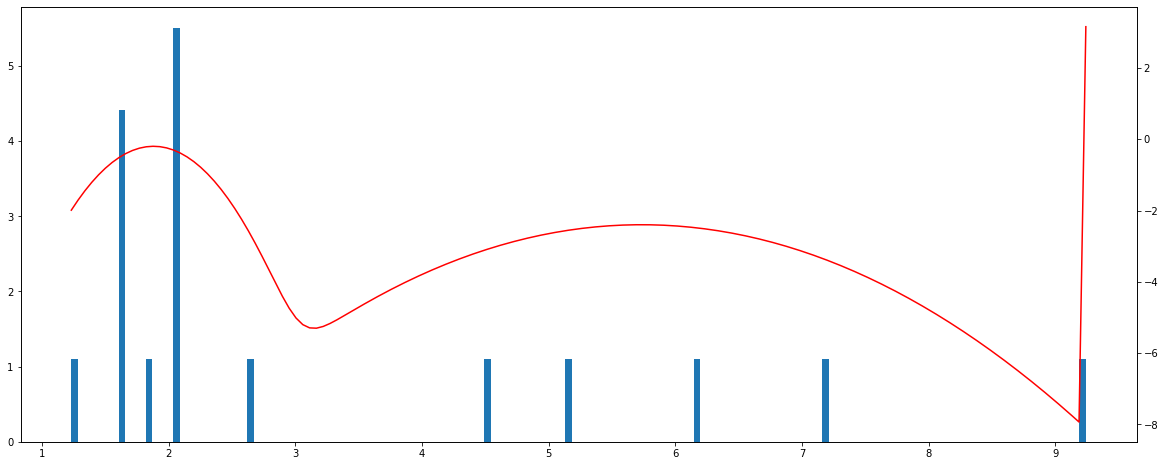

In [160]:
from sklearn import mixture
# plot difference in histogram and find peak value
gmm = mixture.GaussianMixture(n_components=3, covariance_type='spherical', random_state=0)
gmm.fit(p3.values.reshape(-1,1))
gmmfit_X = np.linspace(p3.min(),p3.max(),150)
# plot the histogram and the GMM fit on the same plot
fig, ax = plt.subplots(figsize=(20,8))
ax2 = ax.twinx()
ax.hist(p3, bins=150, density=True, label='data')
ax2.plot(gmmfit_X, gmm.score_samples(gmmfit_X.reshape(-1,1)), label='GMM', color='red')
# retrieve the mean and standard deviation of the fitted distribution
udE_3p3s = gmm.means_
std = gmm.covariances_

In [172]:
print('Energy difference measurements (V)')
print(udE_3p3s)
print('Measured average energy difference 3p-3s for neon: {:.2f} eV'.format(float(udE_3p3s[0])))

Energy difference measurements (V)
[[1.88099002]
 [5.73359475]
 [9.24004783]]
Measured average energy difference 3p-3s for neon: 1.88 eV


## Mercury Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

In [ ]:
# Show calibration data 

In [ ]:
# fit it and get the constants


In [ ]:
# Make and test calibration function


### Apply the calibration

Change peak/trough positions into voltages.

In [ ]:
# Show the Hg peak/trough ositions 

In [ ]:
# Calibrate 
# Recommended: make a new Dataframe.


### Plot and check

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
#
#  Your code here
#
plt.legend();

### Fit positions

As before, fit the peak and trough positions to a line ("traditional") and a quadratic (part of RSB method).  Save the parameters.

In [ ]:
# Line fit, troughs

In [ ]:
# Quadratic fit, troughs

In [ ]:
# Line fit, peaks

In [ ]:
# Quadratic fit, peaks

### Make a plot

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

In [ ]:
# For a smooth curve make an x range with a bunch of points.  100 should be fine.
xfit = np.linspace(0,7.5,100) 
trough_line = line.eval(Hg_troughs_line,x=xfit)
# 
# Etc.

### Calculate peak/trough differences

As before, carry out the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [ ]:
# Same process as before, except you have more data points.
# Recommended: use Python "List comprehensions"

# Your code here

print('List of Hg peak differences (V):', Hg_peak_diffs)
print('List of Hg trough differences (V):', Hg_trough_diffs)

In [ ]:
# Line fit to trough diffs

In [ ]:
# Line fit to peak diffs

### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

In [ ]:
# Plot

## Final results for Hg

Calculate the losest excited state energy, as was done for neon. 

In [ ]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
# Your code here
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\nPeaks analysis:')
# Your code here
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

# Your code here
print('"Traditional" average peak spacing: {:.2uP} V'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2uP} V'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2

# Your code here

print('\nRSB method using line fit to peak/trough position differences')

# Your code here

print('\nRSB method using quadratic fit to peak/trough positions')

# Your code here


## Calculation of mean free path $\lambda$

The parameter $\lambda/L$ contains the mean free path between electron collisions.  Calculate this value for Hg given the measureable distance between the cathode and grid $L$.  See photos of the apparatus to obtain this value.

NOTE: You cannot use the word `lambda` as a variable in Python.  It is a keyword (something that is defined by the language).

In [ ]:
## Your code here.  Use uncertainty objects and uncertainties in fit parameters to get uncertainty in mean free path.


print('CALCULATION OF MEAN FREE PATH, RSB METHOD\n')
#print('Mean free path from troughs fit = {:.2uP} cm'.format(())
#print('Mean free path from peaks fit = {:.2uP} cm'.format(())

# Print comparison to RSB results